In [1]:
import zipfile

with zipfile.ZipFile('./../data/earth_day_missions.csv.zip', 'r') as myzip:
    myzip.extract('earth_day_missions.csv', './../data/')
    myzip.close()

In [2]:
import pandas as pd

df = pd.read_csv('./../data/earth_day_missions.csv', index_col=0, low_memory=False)
df['outcome'] = df.apply(lambda x: 'SATISFIED' if x['satisfied'] else 'IGNORED' if x['ignored'] else 'FAILED', axis=1)
df = df[['start_date', 'user', 'missionId', 'missionType', 'missionSubType', 'period', 'target', 'title', 'outcome']]

df['start_date'] = pd.to_datetime(df['start_date'])
df['user'] = df['user'].astype('category').cat.codes
df['missionId'] = df['missionId'].astype('category').cat.codes
df['missionType'] = df['missionType'].astype('category')
df['missionSubType'] = df['missionSubType'].astype('category')
df['period'] = df['period'].astype('category')
df['outcome'] = pd.Categorical(df['outcome'], categories=['SATISFIED', 'FAILED', 'IGNORED'], ordered=True)

df = df.sort_values(by=['user', 'outcome', 'start_date'], ignore_index=True)

df

,start_date,user,missionId,missionType,missionSubType,period,target,title,outcome
0,2024-03-25,0,14,MEASURE,TYPEFORM_BASE,CUSTOM,1,calculate_carbon_footprint,SATISFIED
1,2024-03-25,0,30,TICKET,TICKET,CUSTOM,1,ticket,SATISFIED
2,2024-04-12,0,28,LEARN,DAILYEPISODE,DAILY,1,watch_the_daily_episode,SATISFIED
3,2024-04-12,0,18,ACT,ALL,DAILY,3,log_3_action,SATISFIED
4,2024-04-15,0,1,SURVEY,SURVEY,WEEKLY,1,fill_survey,SATISFIED
...,...,...,...,...,...,...,...,...,...
267891,2024-04-01,23232,29,ACT,FIXED,WEEKLY,2,log_2_action_vegetarian,IGNORED
267892,2024-04-08,23232,27,LEARN,DAILYEPISODE,WEEKLY,3,watch_the_daily_episode_3_consecutive,IGNORED
267893,2024-04-08,23232,33,ACT,ALL,WEEKLY,2,log_2_action2_consecutive,IGNORED
267894,2024-04-15,23232,1,SURVEY,SURVEY,WEEKLY,1,fill_survey,IGNORED


In [3]:
summary = df.groupby(['missionId', 'title', 'missionType', 'missionSubType', 'period', 'target', 'outcome'], observed=True).size().unstack(fill_value=0)
summary.sort_index(level=[2, 3, 4, 5], inplace=True)

summary

,,,,,outcome,SATISFIED,FAILED,IGNORED
missionId,title,missionType,missionSubType,period,target,,,
8,log_1_action,ACT,ALL,DAILY,1,636,0,0
24,log_2_action,ACT,ALL,DAILY,2,1087,113,0
18,log_3_action,ACT,ALL,DAILY,3,517,115,0
33,log_2_action2_consecutive,ACT,ALL,WEEKLY,2,190,1425,21618
25,log_1_action_energy,ACT,ENERGY,DAILY,1,101,0,0
21,log_2_action_energy,ACT,ENERGY,DAILY,2,814,48,0
26,log_1_action_environment,ACT,ENVIRONMENT,DAILY,1,554,0,0
11,log_1_action_vegetarian,ACT,FIXED,DAILY,1,98,0,0
31,log_action_take5minutesshower,ACT,FIXED,DAILY,1,101,0,0


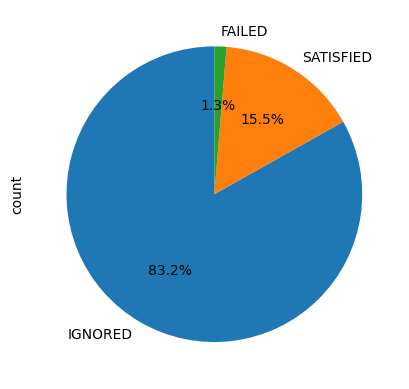

In [4]:
import matplotlib.pyplot as plt

df['outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.show()

In [5]:
df.groupby(['user', 'outcome'], observed=True).size().unstack(fill_value=0)

outcome,SATISFIED,FAILED,IGNORED
user,,,
0,8,2,5
1,1,0,10
2,2,0,10
3,1,0,10
4,1,0,10
...,...,...,...
23228,1,0,10
23229,1,0,10
23230,1,0,10


In [6]:
user_missions_matrix = df[['user', 'missionId', 'outcome']] \
    .drop_duplicates(subset=['user', 'missionId'], keep='last') \
    .pivot(index='user', columns='missionId', values='outcome').fillna('IGNORED')

user_missions_matrix

missionId,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
user,,,,,,,,,,,,,,,,,,,,,
0,IGNORED,SATISFIED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,SATISFIED,...,IGNORED,FAILED,SATISFIED,IGNORED,SATISFIED,IGNORED,IGNORED,FAILED,IGNORED,IGNORED
1,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,...,IGNORED,IGNORED,IGNORED,IGNORED,SATISFIED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED
2,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,...,IGNORED,IGNORED,IGNORED,IGNORED,SATISFIED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED
3,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,...,IGNORED,IGNORED,IGNORED,IGNORED,SATISFIED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED
4,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,...,IGNORED,IGNORED,IGNORED,IGNORED,SATISFIED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23228,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,...,IGNORED,IGNORED,IGNORED,IGNORED,SATISFIED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED
23229,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,...,IGNORED,IGNORED,IGNORED,IGNORED,SATISFIED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED
23230,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED,...,IGNORED,IGNORED,IGNORED,IGNORED,SATISFIED,IGNORED,IGNORED,IGNORED,IGNORED,IGNORED


In [7]:
import random
from tqdm import tqdm

random.seed(42)

data = []
for i, row in tqdm(user_missions_matrix.iterrows()):
    j = 0
    k = 0
    couples = set()

    while j < 10 and k < 100:
        k += 1

        pos_idx = random.choice(row.index)
        neg_idx = random.choice(row.index)

        positive = row[pos_idx]
        negative = row[neg_idx]

        if positive == negative:
            continue
        
        if negative > positive:
            pos_idx, neg_idx = neg_idx, pos_idx

        couples |= {(i, pos_idx, neg_idx)}
        j += 1

    data.extend(couples)

data = pd.DataFrame(data, columns=['user', 'positive', 'negative'])

data

23233it [00:09, 2379.26it/s]


,user,positive,negative
0,0,14,26
1,0,14,32
2,0,5,27
3,0,1,7
4,0,1,35
...,...,...,...
134283,23232,30,25
134284,23232,30,11
134285,23232,30,34
134286,23232,30,0


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from tqdm.auto import tqdm

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

class NeuMF(nn.Module):
    def __init__(self, num_factors, num_users, num_items, hiddens, **kwargs) -> None:
        super().__init__(**kwargs)

        self.P = nn.Embedding(num_users, num_factors)
        self.Q = nn.Embedding(num_items, num_factors)

        self.U = nn.Embedding(num_users, num_factors)
        self.V = nn.Embedding(num_items, num_factors)

        self.mlp = nn.Sequential()
        for h in hiddens:
            self.mlp.add_module('linear', nn.LazyLinear(h))
            self.mlp.add_module('relu', nn.ReLU())
        
        self.prediction = nn.Sequential(
            nn.LazyLinear(1, bias=False),
            nn.Sigmoid()
        )

    def forward(self, user_id, item_id):
        p_mf = self.P(user_id)
        q_mf = self.Q(item_id)
        gmf = p_mf * q_mf

        p_mlp = self.U(user_id)
        q_mlp = self.V(item_id)

        mlp = self.mlp(torch.cat([p_mlp, q_mlp], dim=1))
        con_res = torch.cat([gmf, mlp], dim=1)
        return self.prediction(con_res)


class BPRLoss(nn.Module):
    def __init__(self, **kwargs) -> None:
        super().__init__(**kwargs)

    def forward(self, positive, negative):
        return - torch.sum(torch.log(torch.sigmoid(positive - negative)), dim=0, keepdim=True)
    

class PairwiseDataset(Dataset):
    def __init__(self, data, num_users, num_items) -> None:
        super().__init__()

        self.data = data
        self.num_users = num_users
        self.num_items = num_items

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        row = torch.from_numpy(row.to_numpy()).long()
        return row


def train(model, loss, optimizer, data_loader, num_epochs):
    for _ in (t := tqdm(range(num_epochs))):
        model.train()
        total_loss = 0

        for d in (b := tqdm(data_loader, leave=False)):
            d = d.to(DEVICE)
            user = d[:, 0]
            positive = d[:, 1]
            negative = d[:, 2]

            optimizer.zero_grad()
            positive = model(user, positive)
            negative = model(user, negative)
            l = loss(positive, negative)
            l.backward()
            optimizer.step()
            total_loss += l.item()
            b.set_postfix(loss=l.item())

        t.set_postfix(loss=total_loss / len(data_loader))

cuda


In [9]:
num_users = user_missions_matrix.shape[0]
num_items = user_missions_matrix.shape[1]

model = NeuMF(num_factors=16, num_users=num_users, num_items=num_items, hiddens=[16, 16, 16]).to(DEVICE)

loss = BPRLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
data_loader = DataLoader(PairwiseDataset(data, num_users, num_items), batch_size=64, shuffle=True)

train(model, loss, optimizer, data_loader, num_epochs=10)

/home/riccardo/repos/playngo_challenge_generator/.conda/lib/python3.10/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/2099 [00:00<?, ?it/s]

  0%|          | 0/2099 [00:00<?, ?it/s]

  0%|          | 0/2099 [00:00<?, ?it/s]

  0%|          | 0/2099 [00:00<?, ?it/s]

  0%|          | 0/2099 [00:00<?, ?it/s]

  0%|          | 0/2099 [00:00<?, ?it/s]

  0%|          | 0/2099 [00:00<?, ?it/s]

  0%|          | 0/2099 [00:00<?, ?it/s]

  0%|          | 0/2099 [00:00<?, ?it/s]

  0%|          | 0/2099 [00:00<?, ?it/s]

In [10]:
class Recommender:
    def __init__(self, model, user_missions_matrix) -> None:
        self.model = model
        self.user_missions_matrix = user_missions_matrix
    
    def recommend(self, user_id, top_k=10):
        user = torch.tensor([user_id] * self.user_missions_matrix.shape[1], device=DEVICE)
        items = torch.arange(self.user_missions_matrix.shape[1], device=DEVICE)
        scores = self.model(user, items).squeeze().detach().cpu().numpy()
        scores[self.user_missions_matrix.loc[user_id].notna()] = -1e9
        top_items = scores.argsort()[-top_k:][::-1]
        return top_items
    
recommender = Recommender(model, user_missions_matrix)

In [11]:
all_missions = df[['missionId', 'title']].drop_duplicates().sort_values(by='missionId').set_index('missionId')

all_missions.loc[recommender.recommend(0)]

,title
missionId,
35,log_2_action_water
34,log_1_action_water
33,log_2_action2_consecutive
32,do_checkin
31,log_action_take5minutesshower
30,ticket
29,log_2_action_vegetarian
28,watch_the_daily_episode
27,watch_the_daily_episode_3_consecutive


In [12]:
import numpy as np

history = np.array(user_missions_matrix.loc[0].where(lambda x: x != 'IGNORED').dropna().index)

all_missions.loc[history]

,title
missionId,
1,fill_survey
9,fill_survey
14,calculate_carbon_footprint
18,log_3_action
21,log_2_action_energy
27,watch_the_daily_episode_3_consecutive
28,watch_the_daily_episode
30,ticket
33,log_2_action2_consecutive
